In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

yf.pdr_override()

In [2]:
stock_ticker = ["MSFT", "IBM", "GOOGL"]

stock_data = pdr.get_data_yahoo(stock_ticker)
stock_data

[*********************100%%**********************]  3 of 3 completed


Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
1962-01-02         NaN    1.573411         NaN         NaN    7.291268   
1962-01-03         NaN    1.587165         NaN         NaN    7.355003   
1962-01-04         NaN    1.571347         NaN         NaN    7.281708   
1962-01-05         NaN    1.540403         NaN         NaN    7.138305   
1962-01-08         NaN    1.511519         NaN         NaN    7.004461   
...                ...         ...         ...         ...         ...   
2023-09-20  133.740005  149.830002  320.769989  133.740005  149.830002   
2023-09-21  130.440002  147.380005  319.529999  130.440002  147.380005   
2023-09-22  130.250000  146.910004  317.010010  130.250000  146.910004   
2023-09-25  131.110001  146.479996  317.540009  131.110001  146.479996   
2023-09-26  127.851501  144.529999  312.105011  127.851501  144.529999   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
1962-01-02         NaN         NaN    7.374124         NaN         NaN   
1962-01-03         NaN         NaN    7.355003         NaN         NaN   
1962-01-04         NaN         NaN    7.355003         NaN         NaN   
1962-01-05         NaN         NaN    7.272148         NaN         NaN   
1962-01-08         NaN         NaN    7.131931         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-09-20  320.769989  138.080002  151.929993  329.589996  133.619995   
2023-09-21  319.529999  132.229996  149.250000  325.350006  130.070007   
2023-09-22  317.010010  132.029999  148.100006  321.450012  129.600006   
2023-09-25  317.540009  131.169998  147.429993  317.670013  128.960007   
2023-09-26  312.105011  130.364502  146.169998  315.876007  127.220001   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
1962-01-02    7.291268         NaN         NaN    7.374124         NaN   
1962-01-03    7.291268         NaN         NaN    7.291268         NaN   
1962-01-04    7.278521         NaN         NaN    7.355003         NaN   
1962-01-05    7.125558         NaN         NaN    7.272148         NaN   
1962-01-08    6.947100         NaN         NaN    7.131931         NaN   
...                ...         ...         ...         ...         ...   
2023-09-20  148.130005  320.510010  138.080002  148.360001  329.510010   
2023-09-21  147.309998  315.000000  131.440002  149.000000  319.260010   
2023-09-22  146.820007  316.149994  130.759995  147.410004  321.320007   
2023-09-25  146.250000  315.000000  129.830002  146.570007  316.589996   
2023-09-26  144.300003  310.829987  129.770004  145.509995  315.130005   

                Volume                       
                 GOOGL      IBM        MSFT  
Date                                         
1962-01-02         NaN   407940         NaN  
1962-01-03         NaN   305955         NaN  
1962-01-04         NaN   274575         NaN  
1962-01-05         NaN   384405         NaN  
1962-01-08         NaN   572685         NaN  
...                ...      ...         ...  
2023-09-20  29927500.0  9632400  21436500.0  
2023-09-21  31488700.0  4944600  35529500.0  
2023-09-22  26385200.0  2562000  21429700.0  
2023-09-25  20081000.0  2693400  17815100.0  
2023-09-26  11422702.0  1433795  10544851.0  

[15540 rows x 18 columns]

In [3]:
currency_tickers = ["DEXJPUS", "DEXUSUK"]
currency_data = pdr.get_data_fred(currency_tickers)
currency_data

,DEXJPUS,DEXUSUK
DATE,,
2018-09-28,113.48,1.3053
2018-10-01,113.96,1.3032
2018-10-02,113.66,1.2984
2018-10-03,114.19,1.2993
2018-10-04,113.79,1.3014
...,...,...
2023-09-18,147.63,1.2403
2023-09-19,147.80,1.2393
2023-09-20,147.74,1.2389


In [4]:
index_ticker = ["SP500","DJIA", "VIXCLS"]
index_data = pdr.get_data_fred(index_ticker)
index_data

,SP500,DJIA,VIXCLS
DATE,,,
2018-09-28,2913.98,26458.31,12.12
2018-10-01,2924.59,26651.21,12.00
2018-10-02,2923.43,26773.94,12.05
2018-10-03,2925.51,26828.39,11.61
2018-10-04,2901.61,26627.48,14.22
...,...,...,...
2023-09-19,4443.95,34517.73,14.11
2023-09-20,4402.20,34440.88,15.14
2023-09-21,4330.00,34070.42,17.54


In [5]:
return_period = 5

In [6]:
#Predicted variable is weekly return of Microsoft
#The number of trading day in a week, assume to be five
np.log(stock_data.loc[:,("Adj Close", "MSFT")]).diff(return_period)

Date
1962-01-02         NaN
1962-01-03         NaN
1962-01-04         NaN
1962-01-05         NaN
1962-01-08         NaN
                ...   
2023-09-20   -0.046565
2023-09-21   -0.058264
2023-09-22   -0.040826
2023-09-25   -0.035636
2023-09-26   -0.051654
Name: (Adj Close, MSFT), Length: 15540, dtype: float64

In [7]:
Y = (
    np.log(                                      #get log return
        stock_data.loc[:,("Adj Close", "MSFT")]
    )
    .diff(return_period)                         #5 day log return
    .shift(-return_period))                      #shift upward 5 days, I guess that means all x lagged 5 days/a week
Y

Date
1962-01-02   NaN
1962-01-03   NaN
1962-01-04   NaN
1962-01-05   NaN
1962-01-08   NaN
              ..
2023-09-20   NaN
2023-09-21   NaN
2023-09-22   NaN
2023-09-25   NaN
2023-09-26   NaN
Name: (Adj Close, MSFT), Length: 15540, dtype: float64

In [8]:
#transfer y's name from (Adj Close, MSFT) to MSFT_pred
Y.name = Y.name[-1] + "_pred" 
Y

Date
1962-01-02   NaN
1962-01-03   NaN
1962-01-04   NaN
1962-01-05   NaN
1962-01-08   NaN
              ..
2023-09-20   NaN
2023-09-21   NaN
2023-09-22   NaN
2023-09-25   NaN
2023-09-26   NaN
Name: MSFT_pred, Length: 15540, dtype: float64

In [9]:
#lagged five days 5-day-log-return in GOOGL and IBM
X1 = (
    np.log(
        stock_data.loc[:,("Adj Close", ("GOOGL", "IBM"))] #extract data
    ).diff(return_period)) #5-day log return

X1.columns = X1.columns.droplevel()
X1

,GOOGL,IBM
Date,,
1962-01-02,NaN,NaN
1962-01-03,NaN,NaN
1962-01-04,NaN,NaN
1962-01-05,NaN,NaN
1962-01-08,NaN,NaN
...,...,...
2023-09-20,-0.021964,0.022135
2023-09-21,-0.057065,0.000204
2023-09-22,-0.053441,0.006282


In [10]:
X2 = np.log(currency_data).diff(return_period)
X2

,DEXJPUS,DEXUSUK
DATE,,
2018-09-28,NaN,NaN
2018-10-01,NaN,NaN
2018-10-02,NaN,NaN
2018-10-03,NaN,NaN
2018-10-04,NaN,NaN
...,...,...
2023-09-18,0.007957,-0.010108
2023-09-19,0.004611,-0.006755
2023-09-20,0.001965,-0.007959


In [11]:
X3 = np.log(index_data).diff(return_period)
X3

,SP500,DJIA,VIXCLS
DATE,,,
2018-09-28,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN
2018-10-02,NaN,NaN,NaN
2018-10-03,NaN,NaN,NaN
2018-10-04,NaN,NaN,NaN
...,...,...,...
2023-09-19,-0.004031,-0.003709,-0.008469
2023-09-20,-0.014711,-0.003902,0.116133
2023-09-21,-0.039643,-0.024261,0.313478


In [12]:
X4 =(
    pd.concat(
        [
            np.log(stock_data.loc[:,("Adj Close", "MSFT")])
            .diff(i) for i in [
                return_period, 
                return_period*3, 
                return_period*6, 
                return_period*12
            ]
        ],
        axis = 1
    )
    .dropna() #The reason dropna here because there has most NaN
)
X4.columns = ["MSFT_DT", "MSFT_3DT", "MSFT_6DT", "MSFT_12DT"]
X4

,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,,
1986-06-09,-0.037464,0.015384,-0.030084,0.156699
1986-06-10,-0.037464,0.031008,-0.037464,0.121609
1986-06-11,-0.030084,0.038913,-0.007604,0.104506
1986-06-12,-0.083702,0.016000,-0.023529,0.091354
1986-06-13,-0.083702,0.016000,-0.007904,0.108897
...,...,...,...,...
2023-09-20,-0.046565,-0.023539,-0.014211,-0.022002
2023-09-21,-0.058264,-0.028568,-0.006299,-0.043880
2023-09-22,-0.040826,-0.033348,-0.016387,-0.055616


In [13]:
X = pd.concat([X1, X2, X3, X4], axis = 1)
X

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,-0.021964,0.022135,0.001965,-0.007959,-0.014711,-0.003902,0.116133,-0.046565,-0.023539,-0.014211,-0.022002
2023-09-21,-0.057065,0.000204,0.001697,-0.008985,-0.039643,-0.024261,0.313478,-0.058264,-0.028568,-0.006299,-0.043880
2023-09-22,-0.053441,0.006282,0.002770,-0.010954,-0.029707,-0.019084,0.220966,-0.040826,-0.033348,-0.016387,-0.055616
2023-09-25,-0.052738,0.009535,NaN,NaN,-0.026413,-0.017993,0.188256,-0.035636,-0.034420,-0.008753,-0.051561


In [14]:
data = (
    pd.concat(
        [Y,X],
        axis = 1
    )
    .dropna()
    .iloc[
        ::return_period,
        :
    ]
)
data

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2018-10-05,-0.023095,-0.033057,-0.014522,0.000705,0.003671,-0.009797,-0.000426,0.201121,-0.019780,-0.010998,0.041610,0.077284
2018-10-16,-0.026474,-0.010614,-0.014503,-0.008611,0.005389,-0.024752,-0.024208,0.099576,-0.011287,-0.030608,-0.006376,0.031518
2018-10-23,-0.041265,-0.016166,-0.100762,-0.000357,-0.017410,-0.024946,-0.023809,0.161582,-0.026474,-0.063179,-0.028633,0.029420
2018-10-30,0.037744,-0.060450,-0.128395,0.005692,-0.019524,-0.021412,-0.012655,0.119980,-0.041265,-0.079026,-0.087453,-0.037702
2018-11-06,-0.007267,0.018933,0.064755,0.005483,0.026739,0.026783,0.030110,-0.159375,0.037744,-0.029995,-0.060603,-0.000698
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,0.020330,-0.016341,-0.012020,0.001448,0.003460,-0.021360,-0.022377,0.153380,-0.012097,-0.064765,-0.061360,0.005977
2023-08-25,0.017433,0.018808,0.027481,0.008438,-0.013277,0.008205,-0.004467,-0.098320,0.020330,-0.012637,-0.064534,-0.014497
2023-09-01,0.027845,0.043541,0.017662,-0.001230,0.001907,0.024674,0.014189,-0.180537,0.017433,0.025666,-0.042834,0.018311
2023-09-12,-0.009449,-0.003172,-0.012431,-0.003461,-0.008460,-0.007798,0.000116,0.015581,-0.005351,0.030263,-0.010316,-0.045933


In [15]:
Y = data.loc[:,Y.name]
Y

2018-10-05   -0.023095
2018-10-16   -0.026474
2018-10-23   -0.041265
2018-10-30    0.037744
2018-11-06   -0.007267
                ...   
2023-08-18    0.020330
2023-08-25    0.017433
2023-09-01    0.027845
2023-09-12   -0.009449
2023-09-19   -0.051654
Name: MSFT_pred, Length: 235, dtype: float64

In [16]:
X = data.loc[:, X.columns]
X

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2018-10-05,-0.033057,-0.014522,0.000705,0.003671,-0.009797,-0.000426,0.201121,-0.019780,-0.010998,0.041610,0.077284
2018-10-16,-0.010614,-0.014503,-0.008611,0.005389,-0.024752,-0.024208,0.099576,-0.011287,-0.030608,-0.006376,0.031518
2018-10-23,-0.016166,-0.100762,-0.000357,-0.017410,-0.024946,-0.023809,0.161582,-0.026474,-0.063179,-0.028633,0.029420
2018-10-30,-0.060450,-0.128395,0.005692,-0.019524,-0.021412,-0.012655,0.119980,-0.041265,-0.079026,-0.087453,-0.037702
2018-11-06,0.018933,0.064755,0.005483,0.026739,0.026783,0.030110,-0.159375,0.037744,-0.029995,-0.060603,-0.000698
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,-0.016341,-0.012020,0.001448,0.003460,-0.021360,-0.022377,0.153380,-0.012097,-0.064765,-0.061360,0.005977
2023-08-25,0.018808,0.027481,0.008438,-0.013277,0.008205,-0.004467,-0.098320,0.020330,-0.012637,-0.064534,-0.014497
2023-09-01,0.043541,0.017662,-0.001230,0.001907,0.024674,0.014189,-0.180537,0.017433,0.025666,-0.042834,0.018311
2023-09-12,-0.003172,-0.012431,-0.003461,-0.008460,-0.007798,0.000116,0.015581,-0.005351,0.030263,-0.010316,-0.045933


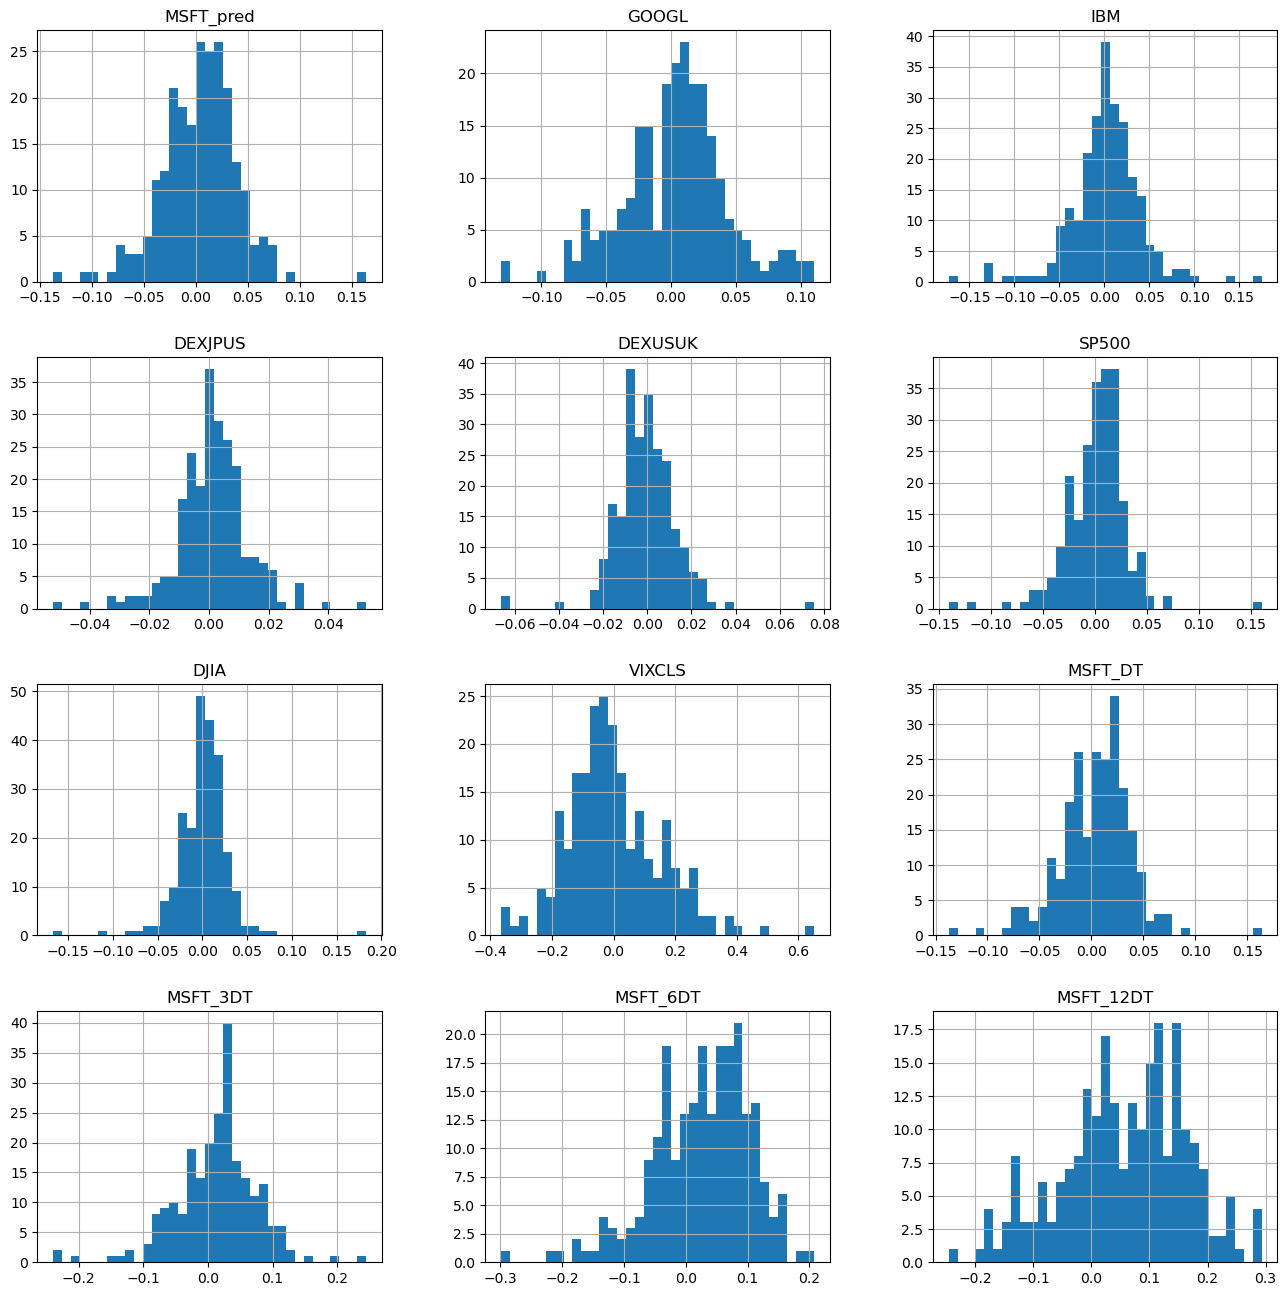

In [17]:
data.hist(bins = 35, figsize=(16,16))
plt.show()

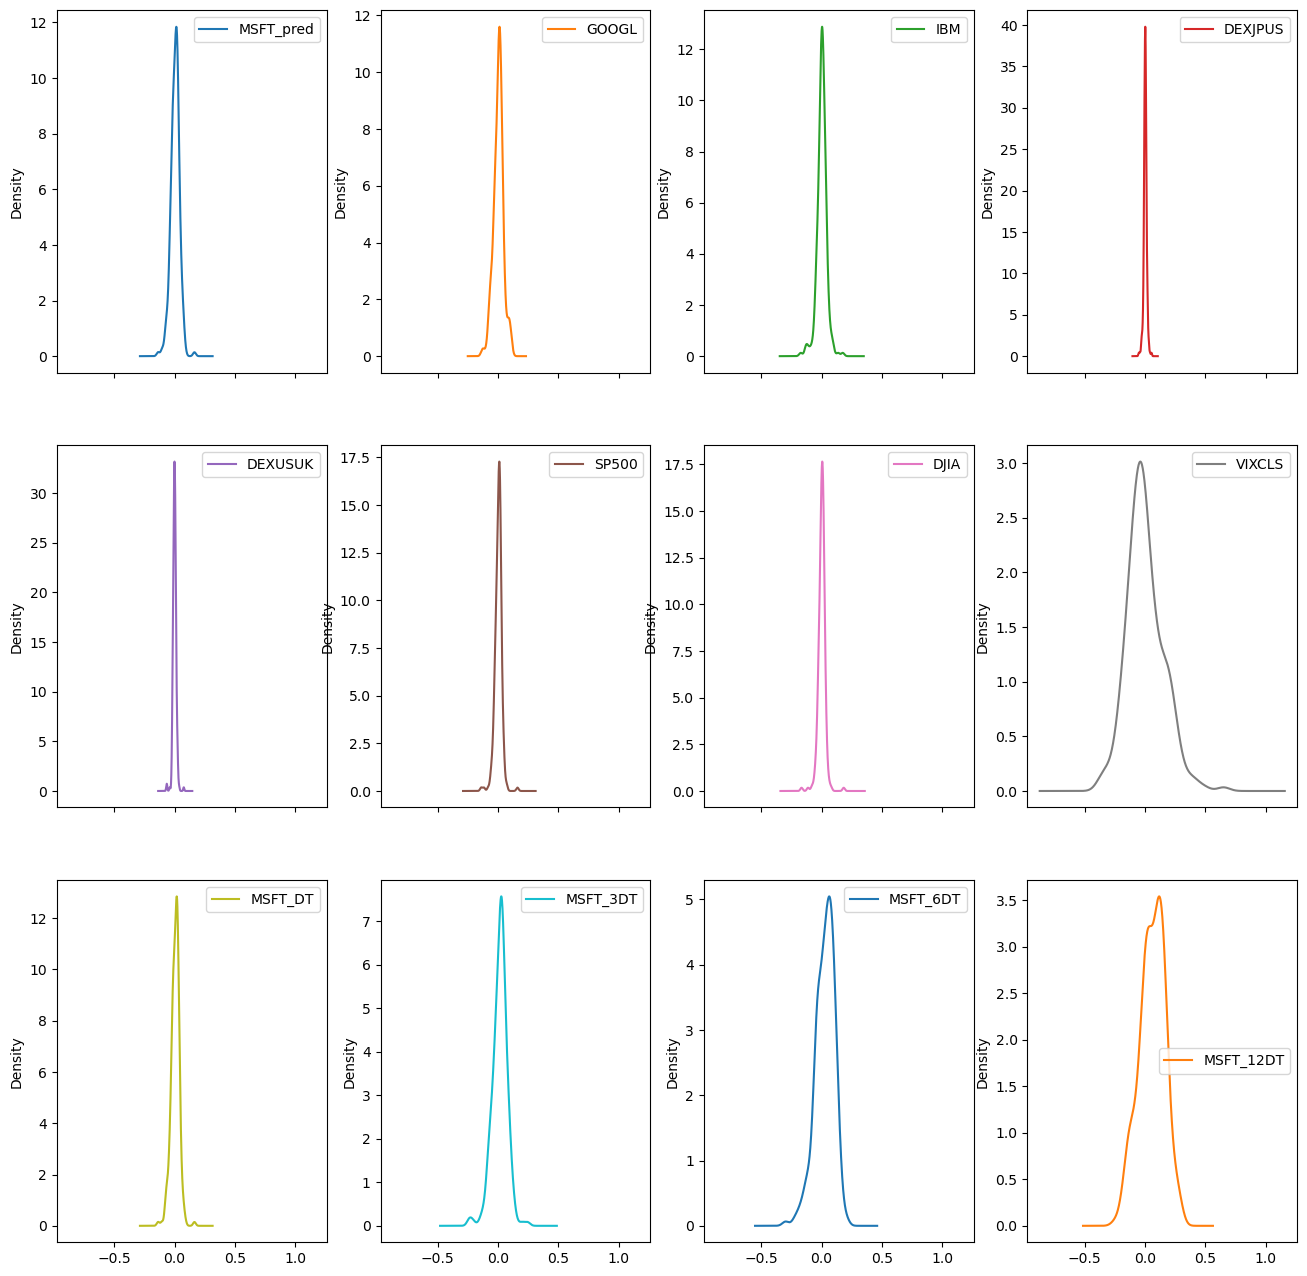

In [18]:
(
    data
    .plot(
        kind="density",
        figsize = (16,16),
        layout=(3,4), 
        subplots = True,
        sharex = True, 
        legend = True
    )
)

plt.show()

In [19]:
correlation = data.corr()

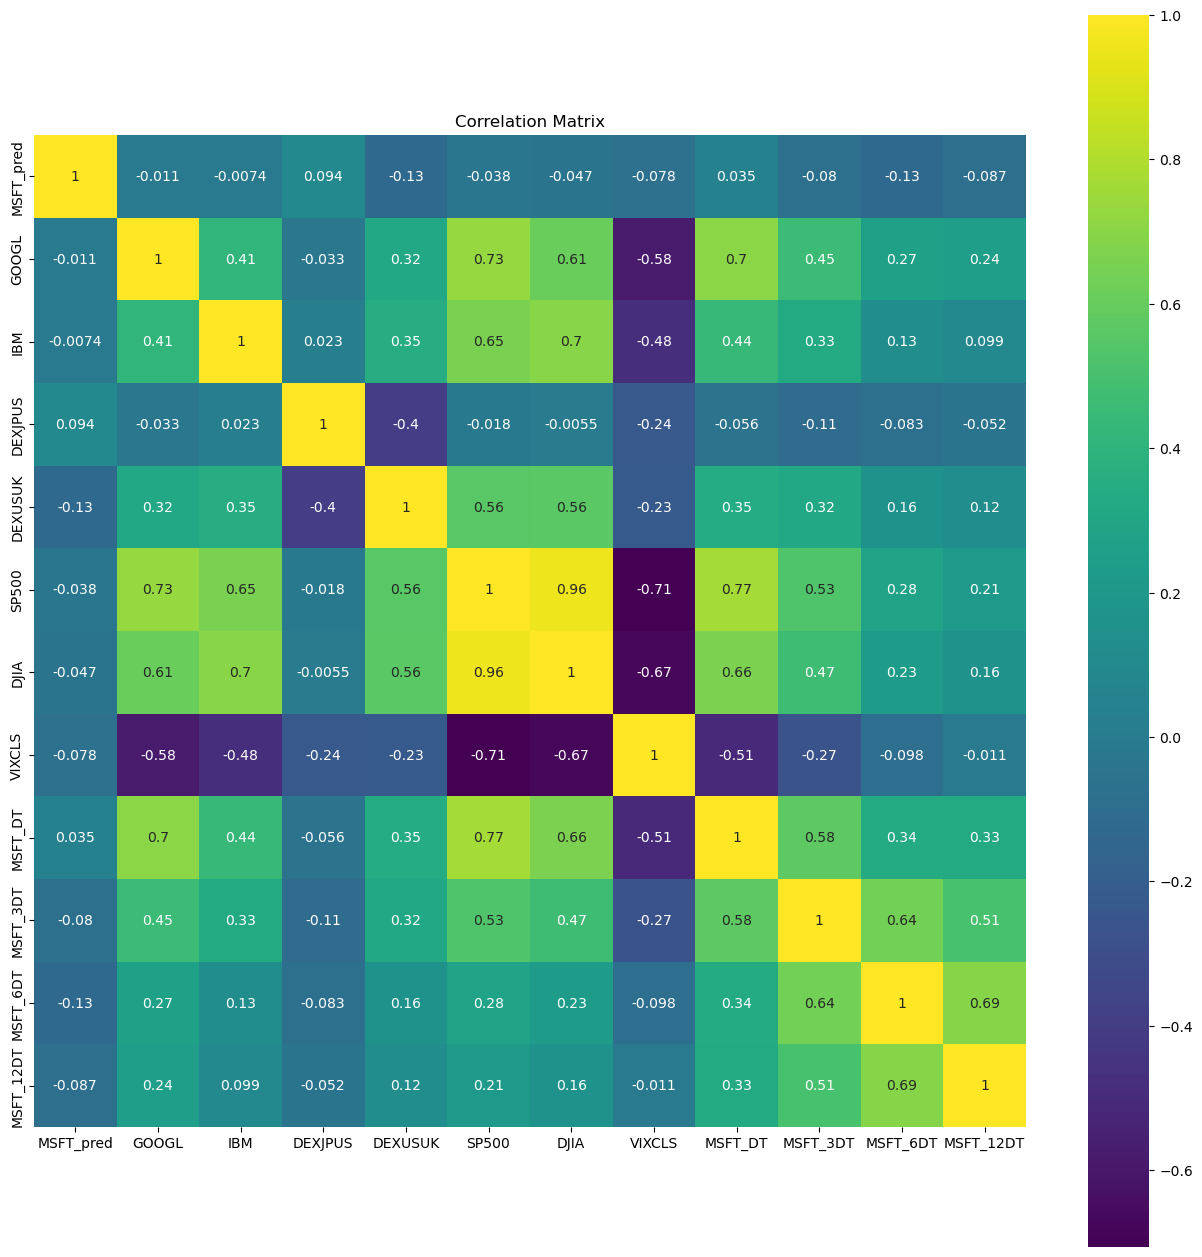

In [20]:
plt.figure(figsize=(16,16))
plt.title("Correlation Matrix")
sns.heatmap(correlation, vmax=1, cmap="viridis", square = True, annot = True)
plt.show()

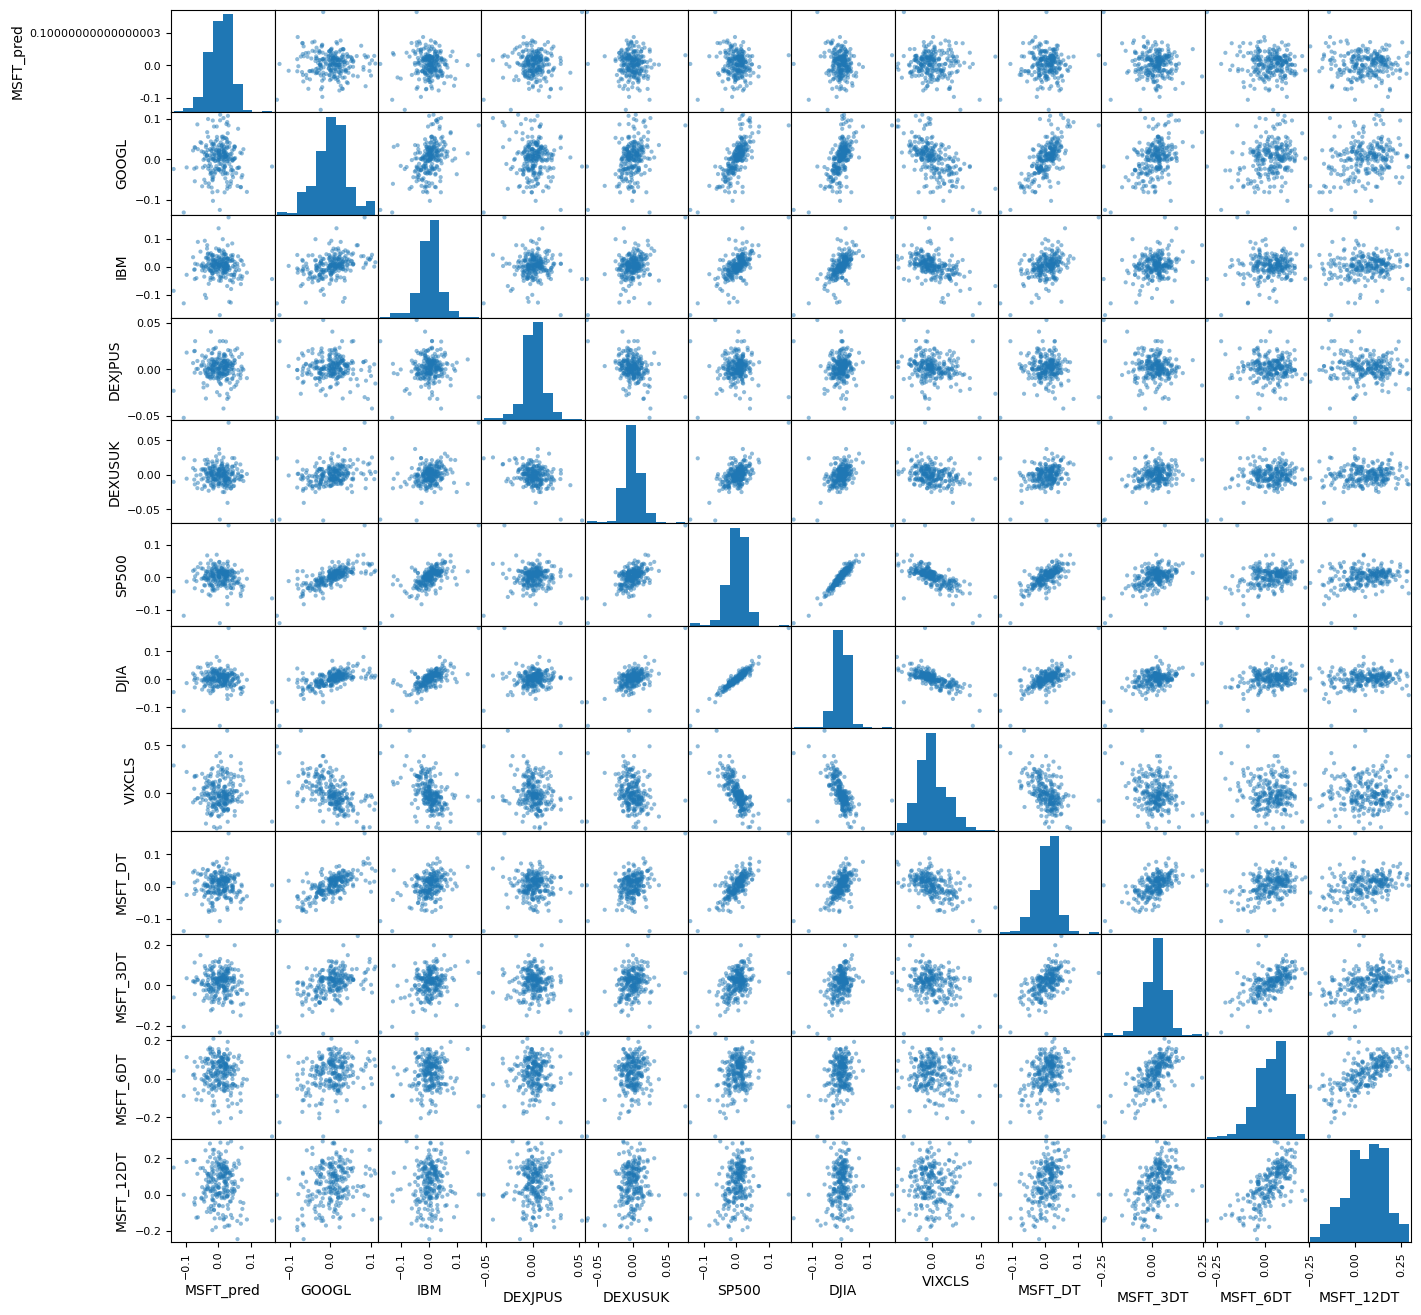

In [21]:
scatter_matrix(data, figsize=(16,16))
plt.show()

In [22]:
validation_size = 0.2

train_size = (
    int(
        (1-validation_size)
        *
        len(X)
    )
)

In [23]:
X_train, X_test = (X[0:train_size], X[train_size : ])
Y_train, Y_test = (Y[:train_size], Y[train_size:])

In [24]:
num_fold = 10
seed = 230926
scoring = "neg_mean_squared_error"

In [25]:
models = []

In [26]:
from sklearn.linear_model import LinearRegression
models.append(("LR", LinearRegression()
              )
             )

from sklearn.linear_model import Lasso
models.append(("LASSO", Lasso()
              )
             )

from sklearn.linear_model import ElasticNet
models.append(("EN", ElasticNet()
              )
             )

from sklearn.tree import DecisionTreeRegressor
models.append(("CART", DecisionTreeRegressor()
              )
             )

from sklearn.neighbors import KNeighborsRegressor
models.append(("KNN", KNeighborsRegressor()
              )
             )

from sklearn.svm import SVR
models.append(("SVR", SVR()
              )
             )

In [27]:
from sklearn.ensemble import RandomForestRegressor
models.append(("RFR", RandomForestRegressor()
              )
             )

from sklearn.ensemble import ExtraTreesRegressor
models.append(("ETR", ExtraTreesRegressor()
              )
             )

from sklearn.ensemble import GradientBoostingRegressor
models.append(("GBR", GradientBoostingRegressor()
              )
             )

from sklearn.ensemble import AdaBoostRegressor
models.append(("ABR", AdaBoostRegressor()
              )
             )

In [28]:
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('CART', DecisionTreeRegressor()),
 ('KNN', KNeighborsRegressor()),
 ('SVR', SVR()),
 ('RFR', RandomForestRegressor()),
 ('ETR', ExtraTreesRegressor()),
 ('GBR', GradientBoostingRegressor()),
 ('ABR', AdaBoostRegressor())]

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

names = []
kfold_results = []
train_results = []
test_results = []

for name, model in models:
    
    names.append(name)
    
    kfold = KFold(n_splits= num_fold, random_state=seed, shuffle=True)
    
    cv_results = (
        -1
        *
        cross_val_score(model, X_train, Y_train,
                        cv = kfold, 
                        scoring=scoring
                       )
    )
    
    kfold_results.append(cv_results)
    
    res = model.fit(X_train, Y_train)
    
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    message = "%s: %f (%f) %f %f"%(name, cv_results.mean(),cv_results.std(), train_result, test_result)
    print(message)

LR: 0.001537 (0.000546) 0.001254 0.001151
LASSO: 0.001369 (0.000617) 0.001365 0.000998
EN: 0.001369 (0.000617) 0.001365 0.000998
CART: 0.002660 (0.000653) 0.000000 0.002689
KNN: 0.001807 (0.000671) 0.001141 0.000954
SVR: 0.001497 (0.000713) 0.001268 0.001069
RFR: 0.001733 (0.000635) 0.000242 0.001172
ETR: 0.001747 (0.000773) 0.000000 0.001178
GBR: 0.002168 (0.000796) 0.000114 0.001220
ABR: 0.001664 (0.000552) 0.000737 0.000950


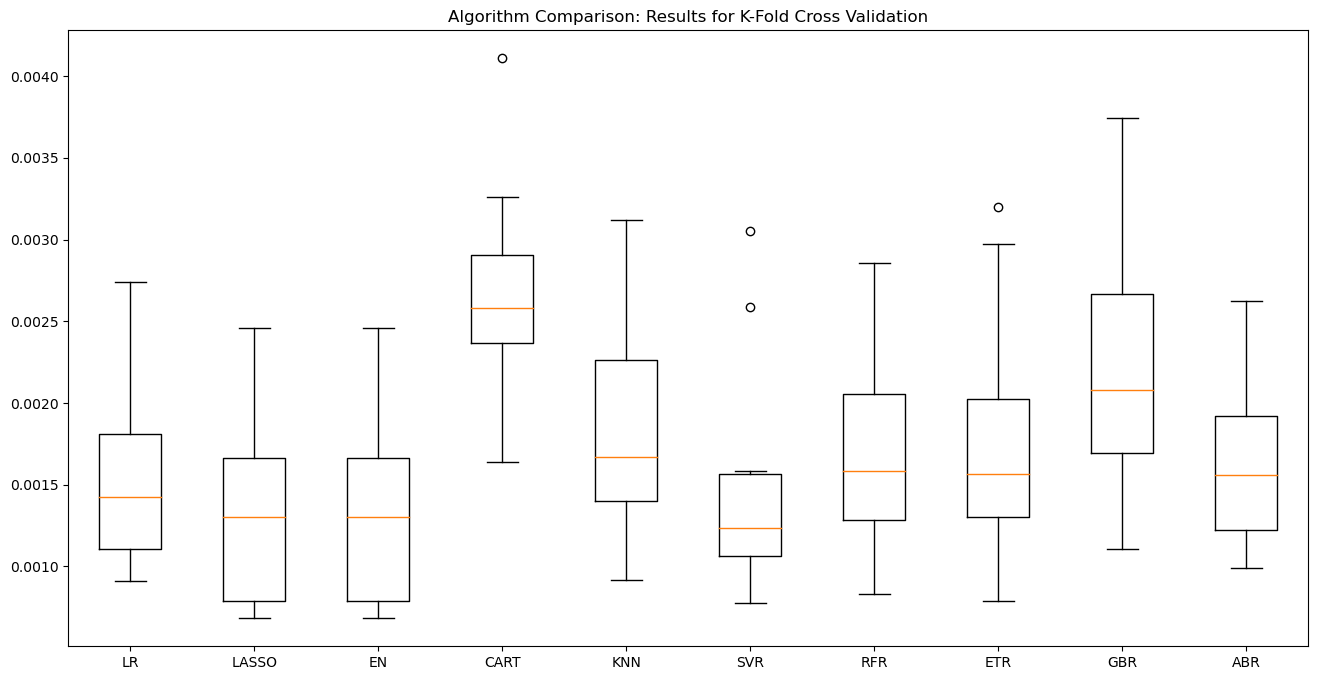

In [85]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.set_xticklabels(names)

plt.title("Algorithm Comparison: Results for K-Fold Cross Validation")
plt.boxplot(kfold_results)
plt.show()

In [86]:
X_train

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2018-10-05,-0.033057,-0.014522,0.000705,0.003671,-0.009797,-0.000426,0.201121,-0.019780,-0.010998,0.041610,0.077284
2018-10-16,-0.010614,-0.014503,-0.008611,0.005389,-0.024752,-0.024208,0.099576,-0.011287,-0.030608,-0.006376,0.031518
2018-10-23,-0.016166,-0.100762,-0.000357,-0.017410,-0.024946,-0.023809,0.161582,-0.026474,-0.063179,-0.028633,0.029420
2018-10-30,-0.060450,-0.128395,0.005692,-0.019524,-0.021412,-0.012655,0.119980,-0.041265,-0.079026,-0.087453,-0.037702
2018-11-06,0.018933,0.064755,0.005483,0.026739,0.026783,0.030110,-0.159375,0.037744,-0.029995,-0.060603,-0.000698
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-23,-0.066589,-0.013417,0.014627,-0.020557,-0.041854,-0.037057,0.202516,-0.055068,0.007998,0.088080,0.040994
2022-08-30,-0.044172,-0.039049,0.017231,-0.016429,-0.035141,-0.034585,0.083514,-0.049954,-0.068810,0.015288,-0.024336
2022-09-07,0.004671,-0.014536,0.040277,-0.015052,0.006269,0.002246,-0.048713,-0.018732,-0.123754,0.026397,0.022079
2022-09-15,-0.051789,-0.023469,-0.003338,-0.001481,-0.026516,-0.025910,0.106757,-0.052165,-0.116832,-0.138644,-0.031382


In [87]:
X_train_ARIMA = X_train.loc[:, ["GOOGL", "IBM", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]
X_test_ARIMA = X_test.loc[:, ["GOOGL", "IBM", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [88]:
import statsmodels.tsa.arima.model as stats

modelARIMA = stats.ARIMA(endog = Y_train, exog = X_train_ARIMA, order = [1,0,0])
model_fit = modelARIMA.fit()

In [89]:
model_fit

In [90]:
error_training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)

predicted = model_fit.predict(start = train_len - 1, end = total_len - 1, exog = X_test_ARIMA)[1:]

In [91]:
error_testing_ARIMA = mean_squared_error(Y_test, predicted)

error_testing_ARIMA

0.0010760919815992964

In [92]:
test_results.append(error_testing_ARIMA)
train_results.append(error_training_ARIMA)
#for ARIMA is not applicable to use kfold
kfold_results = list(kfold_result.mean() for kfold_result in kfold_results)
kfold_results.append(error_testing_ARIMA)

names.append("ARIMA")

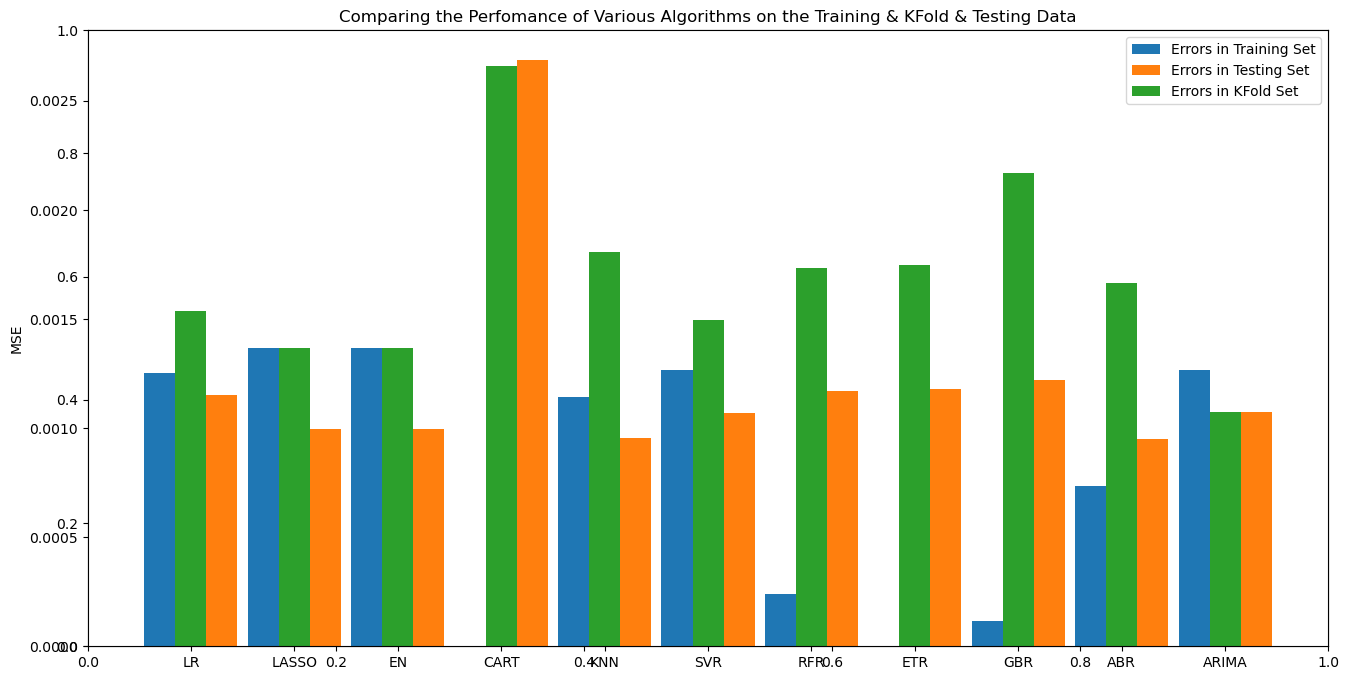

In [95]:
fig = plt.figure(figsize=(16,8))
plt.title("Comparing the Perfomance of Various Algorithms on the Training & KFold & Testing Data")

ax = fig.add_subplot(111)

ind = np.arange(len(names))
width = 0.3

plt.bar(ind - width, train_results, label = "Errors in Training Set", width = width)
plt.bar(ind + width, test_results, label = "Errors in Testing Set", width = width)
plt.bar(ind, kfold_results, label = "Errors in KFold Set", width = width)

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.legend()
plt.ylabel("MSE")
plt.show()

In [105]:
def assess_ARIMA_model(arima_order):
    modelARIMA = stats.ARIMA(endog = Y_train, 
                exog = X_train_ARIMA,
                order = arima_order
               )
    
    
    model_fit = modelARIMA.fit()
    
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    
    return error

def assess_models(p_values, dvalues, q_values):
    
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in dvalues:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = assess_ARIMA_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        
                    print("ARIMA%s MSE = %.7f" % (order, mse))
                except:
                    continue
                    
    print("Best ARIMA%s MSE = %.7f"%(best_cfg, best_score))
        
p_values = range(3)
d_values = range(2)
q_values = range(2)

In [106]:
assess_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE = 0.0012943
ARIMA(0, 0, 1) MSE = 0.0012706
ARIMA(0, 1, 0) MSE = 0.0018688
ARIMA(0, 1, 1) MSE = 0.0013281
ARIMA(1, 0, 0) MSE = 0.0012662
ARIMA(1, 0, 1) MSE = 0.0012650
ARIMA(1, 1, 0) MSE = 0.0017529
ARIMA(1, 1, 1) MSE = 0.0013290
ARIMA(2, 0, 0) MSE = 0.0012612
ARIMA(2, 0, 1) MSE = 0.0012697
ARIMA(2, 1, 0) MSE = 0.0016928
ARIMA(2, 1, 1) MSE = 0.0017627
Best ARIMA(2, 0, 0) MSE = 0.0012612


In [107]:
ARIMA_Tuned = stats.ARIMA(Y_train, X_train_ARIMA, (2,0,0))
ARIMA_Fit_Tuned = ARIMA_Tuned.fit()

In [108]:
ARIMA_Fit_Tuned

In [109]:
Predicted_Tuned =\
    ARIMA_Fit_Tuned \
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1:]

In [110]:
print(mean_squared_error(Y_test,
                         Predicted_Tuned)
     )

0.0011119470766336056


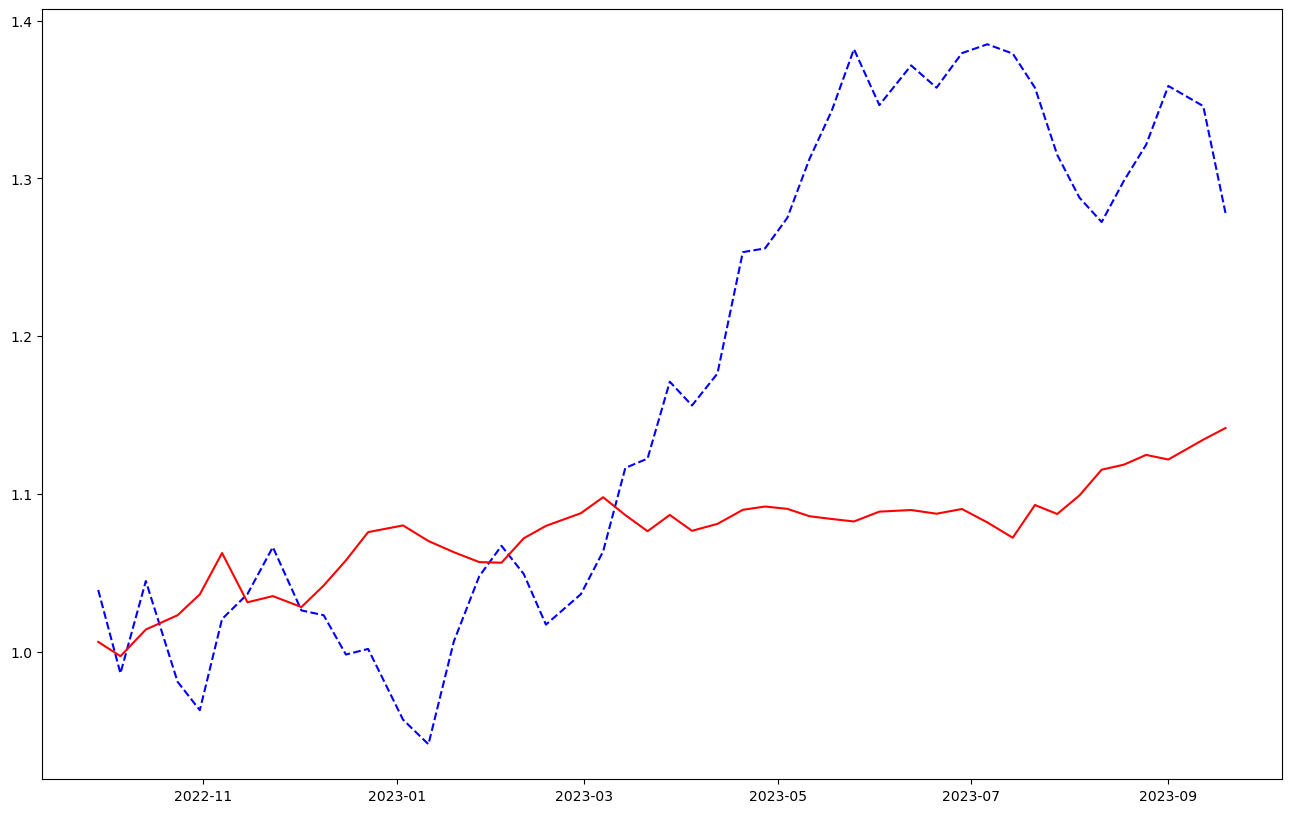

In [111]:
plt.figure(figsize = (16, 10)
           )

Predicted_Tuned.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(Predicted_Tuned).cumprod(), "r", label = "Predicted Y (Y hat)")

plt.show()